In [56]:
# Problem Statement and Approach for Task 3

# Problem Statement:
# The goal of this task is to perform customer segmentation using clustering techniques...

# Approach:
# 1. Data Preparation:
#    - Merge the Customers and Transactions datasets...
#    - Perform feature engineering...
# 2. Data Preprocessing:
#    - Normalize the features using StandardScaler...
# 3. Clustering:
#    - Find number of clusters using Elbow Method   
#    - Use the K-Means clustering algorithm...
# 4. Evaluation:
#    - Evaluate the clustering performance using Davies-Bouldin  Index...
# 5. Visualization:
#    - Visualize the clusters...
# 6. Output:
#    - Save the clustering results...


In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [58]:
# Loading the datasets into variables
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merging datasets
# Merge transactions with customers
merged_data = pd.merge(transactions, customers, on="CustomerID")
# Merge with products
merged_data = pd.merge(merged_data, products, on="ProductID", suffixes=('_transaction', '_product'))

FileNotFoundError: [Errno 2] No such file or directory: 'Customers.csv'

In [46]:
# Applying Feature Engineering
# Create customer-level features
customer_features = merged_data.groupby("CustomerID").agg(
    total_spending=("TotalValue", "sum"),  # Total spending per customer
    num_transactions=("TransactionID", "nunique"),  # Number of transactions
    avg_transaction_value=("TotalValue", "mean"),  # Average transaction value
    preferred_category=("Category", lambda x: x.mode()[0]),  # Most purchased category
    days_since_signup=("SignupDate", lambda x: (datetime.now() - pd.to_datetime(x)).dt.days.mean())  # Days since signup
).reset_index()

# One-hot encode the preferred category
customer_features = pd.get_dummies(customer_features, columns=["preferred_category"], drop_first=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_892\4212722930.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  days_since_signup=("SignupDate", lambda x: (datetime.now() - pd.to_datetime(x)).dt.days.mean())  # Days since signup
C:\Users\HP\AppData\Local\Temp\ipykernel_892\4212722930.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  days_since_signup=("SignupDate", lambda x: (datetime.now() - pd.to_datetime(x)).dt.days.mean())  # Days since signup
C:\Users\HP\AppData\Local\Temp\ipykernel_892\4212722930.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  days_since_signup=("SignupDate", lambda x: (datetime.now() - pd.to_datetime(x)).dt.days.mea

In [ ]:
# Normalizing features using MinMaxScaler
scaler = MinMaxScaler()
feature_columns = [col for col in customer_features.columns if col != "CustomerID"]
customer_features_scaled = scaler.fit_transform(customer_features[feature_columns])

In [48]:
#Perform Clustering
# Chose the number of clusters = 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(customer_features_scaled)

In [49]:
# Evaluate Clustering
db_index = davies_bouldin_score(customer_features_scaled, customer_features["Cluster"])
print(f"DB (Davies-Bouldin) Index: {db_index}")


DB (Davies-Bouldin) Index: 0.8549946326430091


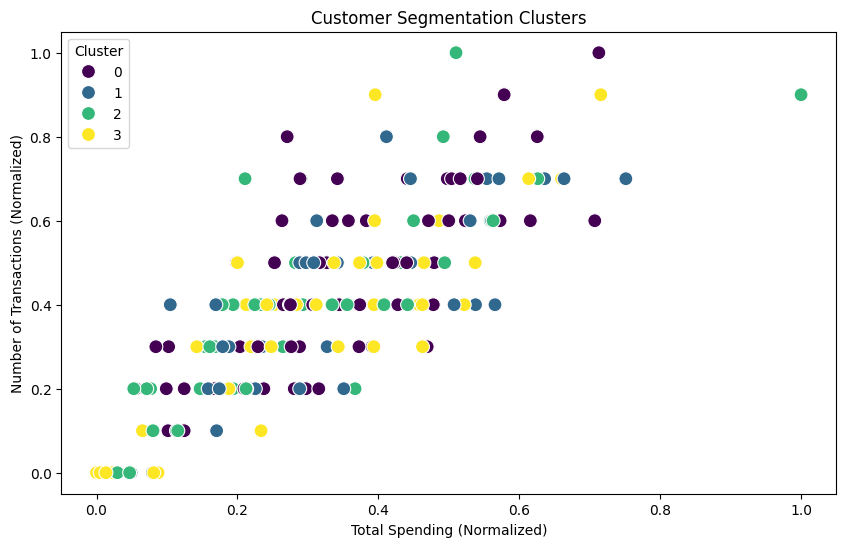

In [52]:
# Visualize Clusters (Scatter Plot of first two principal features)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_features_scaled[:, 0],  # Total Spending
    y=customer_features_scaled[:, 1],  # Number of Transactions
    hue=customer_features["Cluster"],
    palette="viridis",
    s=100
)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Total Spending (Normalized)")
plt.ylabel("Number of Transactions (Normalized)")
plt.legend(title="Cluster")
plt.show()


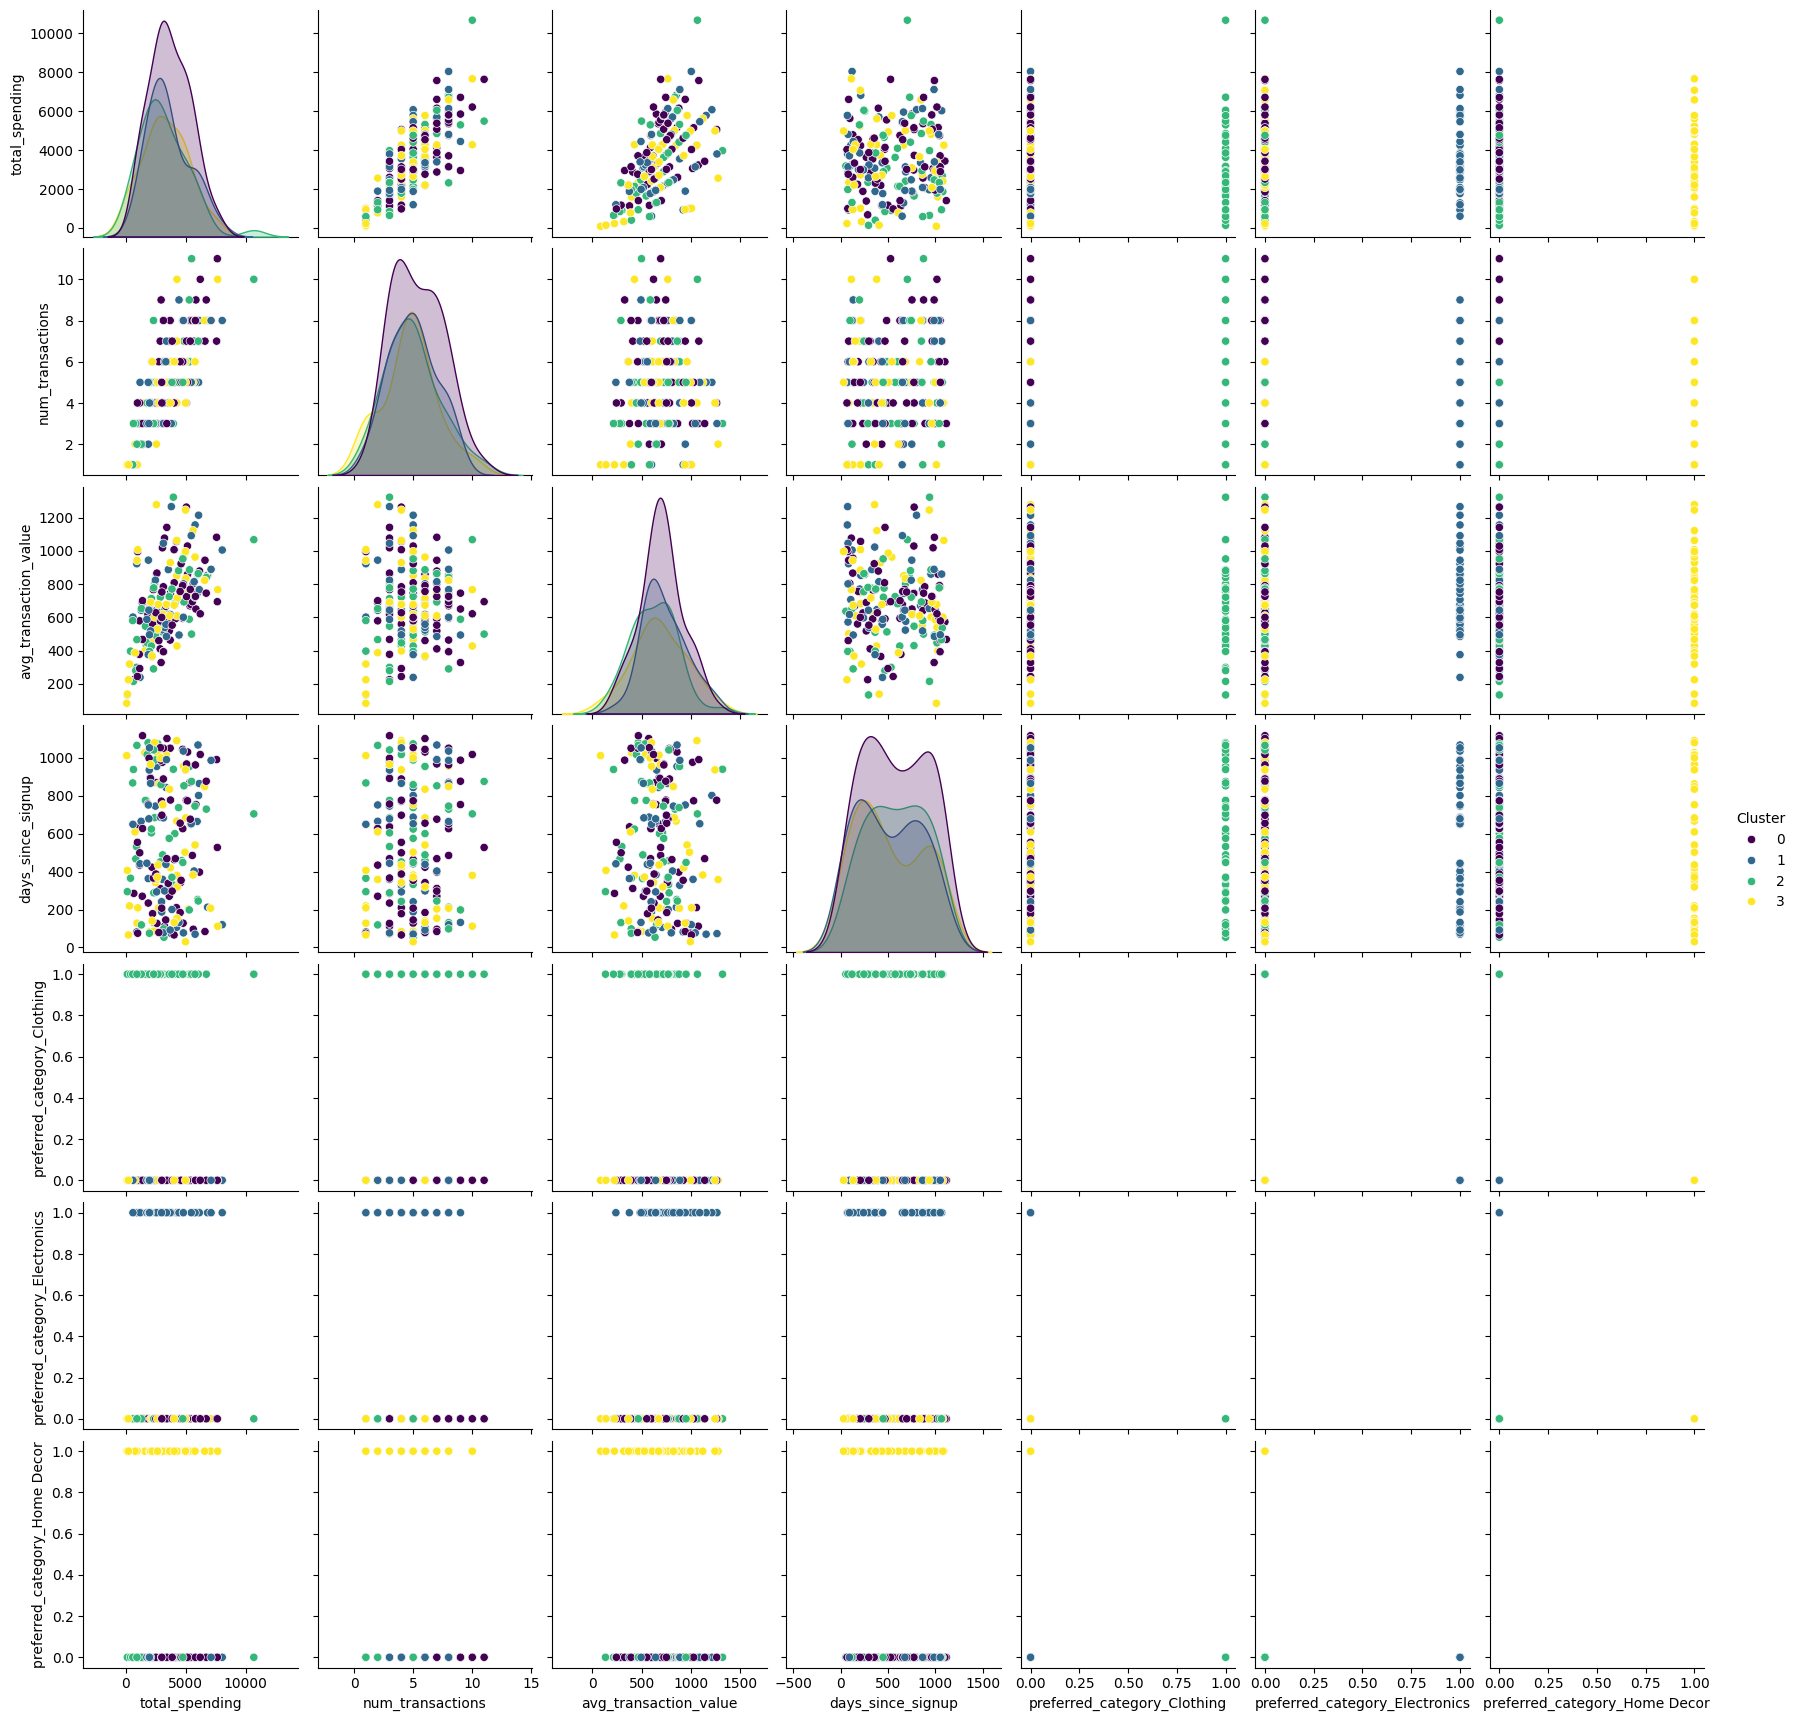

In [53]:

# Pair Plot of Clusters
sns.pairplot(customer_features, hue="Cluster", palette="viridis")
plt.show()

In [55]:
# Save clustering results
customer_features.to_csv("Aaditya_Vijayvargiya_Clustering.csv", index=False)
print("Aaditya_Vijayvargiya_Clustering.csv has been generated successfully!")

Aaditya_Vijayvargiya_Clustering.csv has been generated successfully!
